<a href="https://colab.research.google.com/github/vilsonrodrigues/DigitalImageProcessing/blob/main/DCA0445/lesson7_frequencia/pdi_lesson7_frequencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

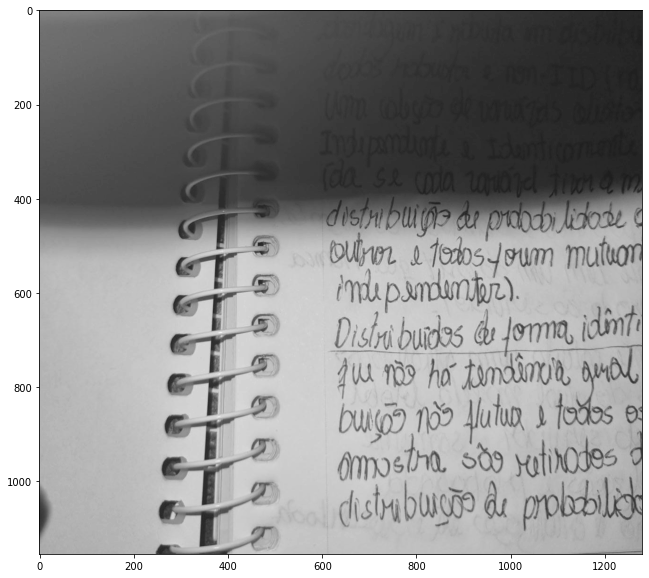

In [4]:
# Ploting in grayscale with matplotlib #
fname = 'mal-iluminado.jpg'
img = Image.open(fname).convert("L")
img = np.asarray(img)

plt.figure(figsize=(15,10))
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

plt.show()

In [6]:
axisX, axisY = img.shape

In [7]:
centerPointX = int(axisX /2)
centerPointY = int(axisY /2)

In [8]:
img_switch = img.copy()

In [9]:
img_switch[0:centerPointX,0:centerPointY] = img[centerPointX:axisX,centerPointY:axisY]
img_switch[0:centerPointX,centerPointY:axisY] = img[centerPointX:axisX,0:centerPointY]
img_switch[centerPointX:axisX,0:centerPointY] = img[0:centerPointX,centerPointY:axisY]
img_switch[centerPointX:axisX,centerPointY:axisY] = img[0:centerPointX,0:centerPointY]

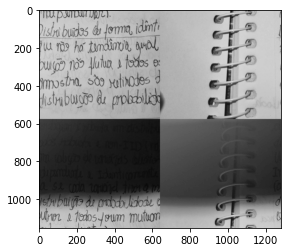

In [11]:
plt.imshow(img_switch, cmap="gray")

Obtem o melhor tamanho da imagem para calcular a DFT e preenche com padding

In [12]:
m = cv.getOptimalDFTSize(axisX)
n = cv.getOptimalDFTSize(axisY)

img_pad = cv.copyMakeBorder(img, 0, m - axisX, 0, n - axisY, cv.BORDER_CONSTANT, value=[0, 0, 0])

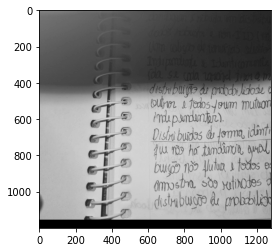

In [13]:
plt.imshow(img_pad, cmap="gray")

In [14]:
def homo_filter(img, tresh1, tresh2, c, d0):
    
    img_copy = img.copy()
    
    img_dft = cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT)
    img_dft = np.fft.fftshift(img_dft)

    magnetude = cv.magnitude(img_dft[:, :, 0], img_dft[:, :, 1])
    magnetude_spectrum = 20 * np.log(magnetude)

    height = img.shape[0]
    width = img.shape[1]

    m = (height/2)
    n = (width/2)

    # Creating a mask for low-pass filter 
    tmp = np.zeros((height, width, 2), dtype=np.float32)

    for i in range(height):
        for j in range(width):
            tmp[i][j] = (tresh1 - tresh2)*(1 - np.exp(-c*(( (i-m)*(i-m) + (j-n)*(j-n) ) / (d0*d0) ))) + tresh2

    fshift = img_dft * tmp
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv.idft(f_ishift)
    
    img_back = cv.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    img_back = img_back.astype(np.float32)

    return img_back

l1 e l2 informam a região de ganho que será dada no filtro para as freq. D0 é a frequência de corte. C diz quanto o D0 seja alto ou baixo

Nenhum dos valores que eu testei produziu um resultado bom

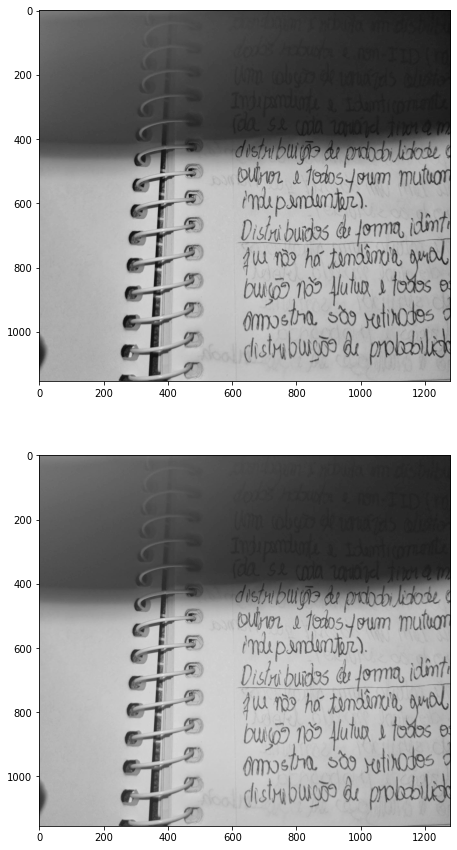

In [29]:
img_filtered = homo_filter(img, 30, 25, 25, 25)
f, ax = plt.subplots(2, 1,figsize=(15,15))

ax[0].imshow(img_filtered, cmap='gray')
ax[1].imshow(img, cmap='gray', vmin=0, vmax=255)

plt.show()